In [134]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams.update({'font.size': 18})

# Relaxation Methods for Partial Diﬀerential Equations

* Author: Pochung Chen
* Email: pcchen@phys.nthu.edu.tw

Last updated on 11/8/2021

## Physics background

For a region of space containing a charge density $\rho$, the electrostatic potential $V$ satisfies **Poission's equation**:

$$
  \nabla^2 V 
  = \frac{\partial^2 V}{\partial^2 x} + \frac{\partial^2 V}{\partial^2 y} + \frac{\partial^2 V}{\partial^2 z}
  = -\frac{1}{\epsilon_0} \rho
$$

When $\rho=0$ Poission's equation reduces to **Laplace's equation**:

$$
  \nabla^2 V
  = \frac{\partial^2 V}{\partial^2 x} + \frac{\partial^2 V}{\partial^2 y} + \frac{\partial^2 V}{\partial^2 z}
  = 0.
$$

From the potential we can derive the electric field,
$$
  \vec{E}
  = -\vec{\nabla}V
  = \left(-\frac{\partial V}{\partial x}, -\frac{\partial V}{\partial y}, -\frac{\partial V}{\partial z}\right).
$$


## Discretization and the relaxation method

We consider a mesh of grid points that covers the domain of interest. For simplicity we assume in each direction the spacing between grid points is $h$.

$$
  (x_i, y_j, z_k) = (x_0, y_0, z_0) + h (i, j, k).
$$

We need to find the discretized version of the differential operator $\nabla^2$.

We first Taylor expand $V(x,y,z)$ in $x$ to second order:

$$
  V(x\pm h,y,z) = V(x,y,z) \pm h \frac{\partial V}{\partial x} + \frac{1}{2}h^2 \frac{\partial^2 V}{\partial x^2} + \cdots
$$

so that

$$
  \frac{\partial^2 V}{\partial x^2} \approx \frac{V(x+h)+V(x-h)-2V(x)}{h^2}
$$
and similarly for $y$ and $z$.

We hence obtain the discrete approximation to the laplacian:

$$
  \nabla^2 V \approx
  \frac{V(x+h,y,z)+V(x-h,y,z)-2V(x,y,z)}{h^2} + \frac{V(x,y+h,z)+V(x,y-h,z)-2V(x,y,z)}{h^2} + \frac{V(x,y,z+h)+V(x,y,z-h)-2V(x,y,z)}{h^2}
$$

## Laplace's equation

If we use a grid notation
* $V(x, y, z)=V_{i,j,k}$
* $V(x+h, y, z)=V_{i+1, j, k}$
* $V(x, y+h, z)=V_{i, j+1, k}$
* $V(x, y, z+h)=V_{i, j, k+1}$

then the discretized verion of Laplace's equation becomes

$$
  h^2 \nabla^2 V = 0 \approx 
  \left( V_{i+1,j,k}+V_{i-1,j,k}+V_{i,j+1,k}+V_{i,j-1,k}+V_{i,j,k+1}+V_{i,j,k-1} \right)
  -6V_{i,j,k}.
$$

This can be re-written as

$$
  V_{i,j,k} = \frac{1}{6}\left( V_{i+1,j,k}+V_{i-1,j,k}+V_{i,j+1,k}+V_{i,j-1,k}+V_{i,j,k+1}+V_{i,j,k-1} \right).
$$

For effective 2D problems,

$$
  V_{i,j} = \frac{1}{4}\left( V_{i+1,j}+V_{i-1,j}+V_{i,j+1}+V_{i,j-1} \right).
$$

For effective 1D problems,

$$
  V_{i} = \frac{1}{2}\left( V_{i+1}+V_{i-1} \right).
$$



## Poission's equation

If charges are present. First we replace the charge density $\rho(x,y,z)$ by a discrete distribution $\rho_{i,j,k}=\rho(x_i,y_j,z_k)$.

The discretized version of Poisson's equation becomes

$$
  h^2 \nabla^2 V = -h^2 \frac{1}{\epsilon_0} \rho_{i,j,k} \approx 
  -6V_{i,j,k}.
$$

This can be re-written as

$$
  V_{i,j,k} = \frac{1}{6}\left( V_{i+1,j,k}+V_{i-1,j,k}+V_{i,j+1,k}+V_{i,j-1,k}+V_{i,j,k+1}+V_{i,j,k-1} + \frac{1}{\epsilon_0}h^3\rho_{i,j,k} \right).
$$

For effective 2D problems,

$$
  V_{i,j} = \frac{1}{4}\left( V_{i+1,j}+V_{i-1,j}+V_{i,j+1}+V_{i,j-1} + \frac{1}{\epsilon_0}h^2\rho_{i,j,k} \right).
$$

For effective 1D problems,

$$
  V_{i} = \frac{1}{2}\left( V_{i+1}+V_{i-1} + \frac{1}{\epsilon_0}h\rho_{i,j,k} \right).
$$


### Exact solution in 1D
In 1D, the Laplace's equation reads

$$
  \frac{d^2 V(x)}{dx^2} = 0.
$$

The solution has the form $V(x)=ax+b$ where $a$ and $b$ are constants.

## Tasks: Jacobi method and Gauss-Seidel method

* Write a program to compute $V$ in a rectangular domain with Dirichlet boundary conditions. 
* Allow the potentials on all four sides to be specified arbitrarily. 
* The number of grid point can be changed.

#### Jacobi and Gauss-Seidel methods

* Study the relative speed of the Jacobi and Gauss-Seidel methods.

In [16]:
#a=np.array([0])

a=np.array([1,1,1,1,1])
b=np.array([1,1,1,1,1])
c=np.array(b[2:]+a[0:-2])
c=np.append(np.append([0],c),[100])

print(c)


[  0   2   2   2 100]


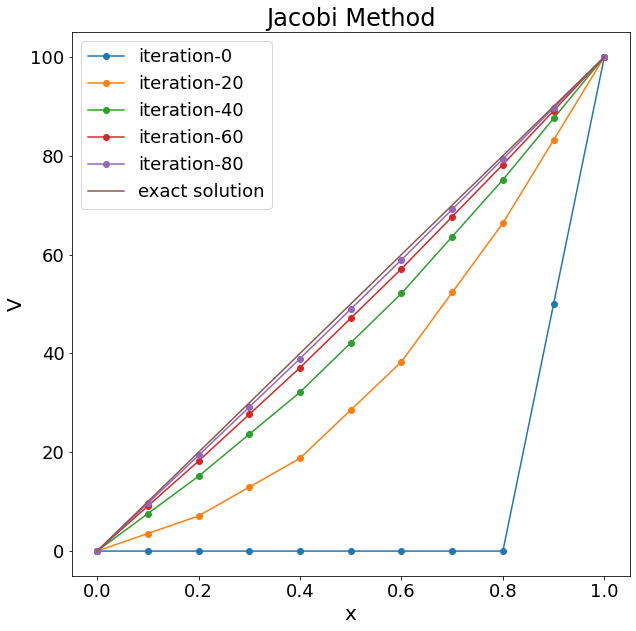

In [158]:
x=np.linspace(0,1,11)
y=np.linspace(0,100,101)
v=np.zeros(11)
v1=np.zeros(11)
v[10]=100
fig, ax=plt.subplots(ncols=1,nrows=1,figsize=(10,10))
#Jacobi Method
for j in range (100):
    a=np.array(0.5*(v[0:-2]+v[2:]))
    v=np.append(np.append([0],a),[100])
    if j%20==0:
        ax.plot(x,v,'-o',label="iteration-"+format(j))
ax.plot(x,100*x,label="exact solution")
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('V',fontsize=20)
ax.legend()
ax.set_title('Jacobi Method', fontsize=24)
plt.savefig('relaxation/Jacobi Method.pdf')

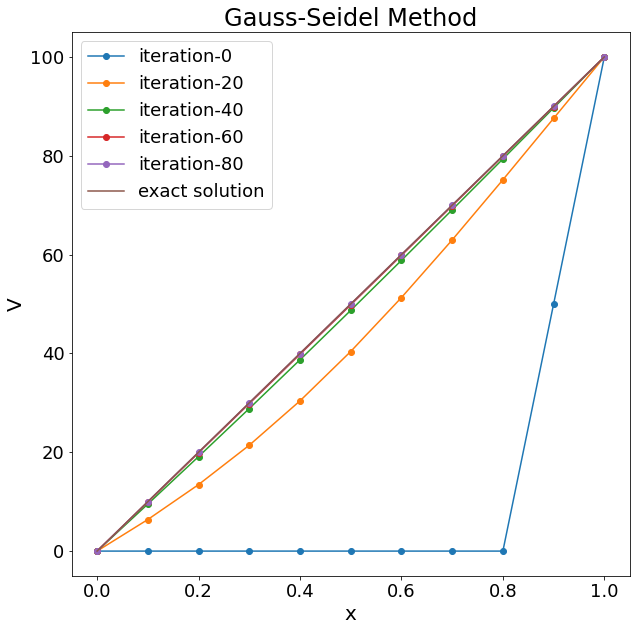

In [159]:
#Gauss-Seidel Method
fig, ax=plt.subplots(ncols=1,nrows=1,figsize=(10,10))
v=np.zeros(11)
v[10]=100
for j in range (100):
    for i in range (1,10):
        v[i]=0.5*(v[i-1]+v[i+1])          
    if j%20==0:
        ax.plot(x,v,'-o',label="iteration-"+format(j))
ax.plot(x,100*x,label="exact solution")
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('V',fontsize=20)
ax.legend()
ax.set_title('Gauss-Seidel Method', fontsize=24)
plt.savefig('relaxation/Gauss-Seidel Method.pdf')

### Initial conditions

* Study if the initial guess have a significant impact on overall speed.

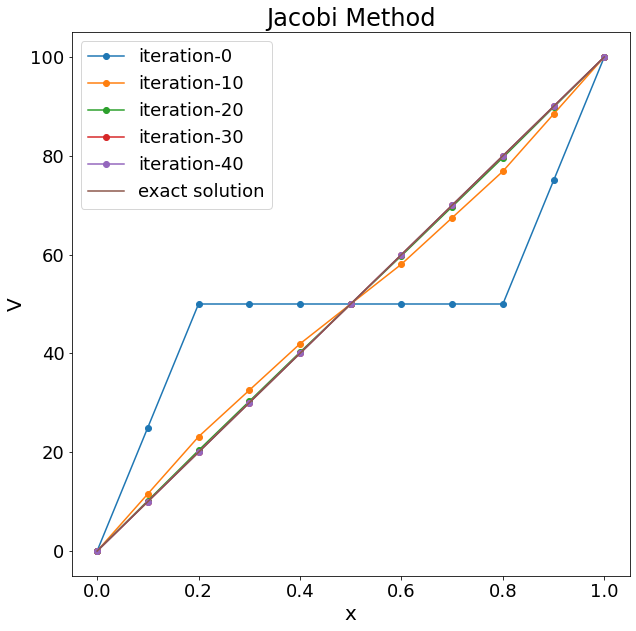

In [160]:
x=np.linspace(0,1,11)
y=np.linspace(0,100,101)
v=np.full(11,50)
v[10]=100
v[0]=0
fig, ax=plt.subplots(ncols=1,nrows=1,figsize=(10,10))
#Jacobi Method
for j in range (50):
    a=np.array(0.5*(v[0:-2]+v[2:]))
    v=np.append(np.append([0],a),[100])
    if j%10==0:
        ax.plot(x,v,'-o',label="iteration-"+format(j))
ax.plot(x,100*x,label="exact solution")
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('V',fontsize=20)
ax.legend()
ax.set_title('Jacobi Method', fontsize=24)
plt.savefig('relaxation/Jacobi Method2.pdf')

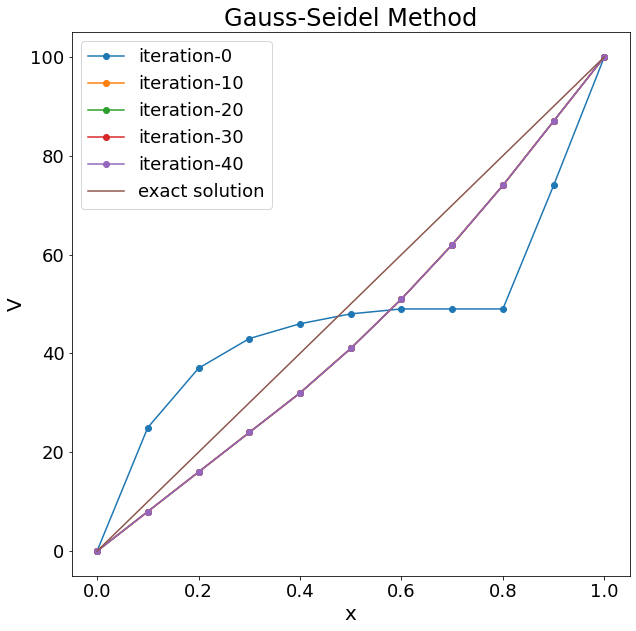

In [161]:
#Gauss-Seidel Method
fig, ax=plt.subplots(ncols=1,nrows=1,figsize=(10,10))
v=np.full(11,50)
v[10]=100
v[0]=0
v[10]=100
for j in range (50):
    for i in range (1,10):
        v[i]=0.5*(v[i-1]+v[i+1])          
    if j%10==0:
        ax.plot(x,v,'-o',label="iteration-"+format(j))
ax.plot(x,100*x,label="exact solution")
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('V',fontsize=20)
ax.legend()
ax.set_title('Gauss-Seidel Method', fontsize=24)
plt.savefig('relaxation/Gauss-Seidel Method2.pdf')

## Tasks: Contour plots (equipotentials) and electric field 

* Write a program to compute $V$ in a rectangular domain with Dirichlet boundary conditions. 
* Allow the potentials on all four sides to be specified arbitrarily. 
* The number of grid point can be changed.
* Use Jacobi method or Gauss-Seidel method.
* Use some good initial guess.
* Plot the equipotentials.
* Plot the electric fields.

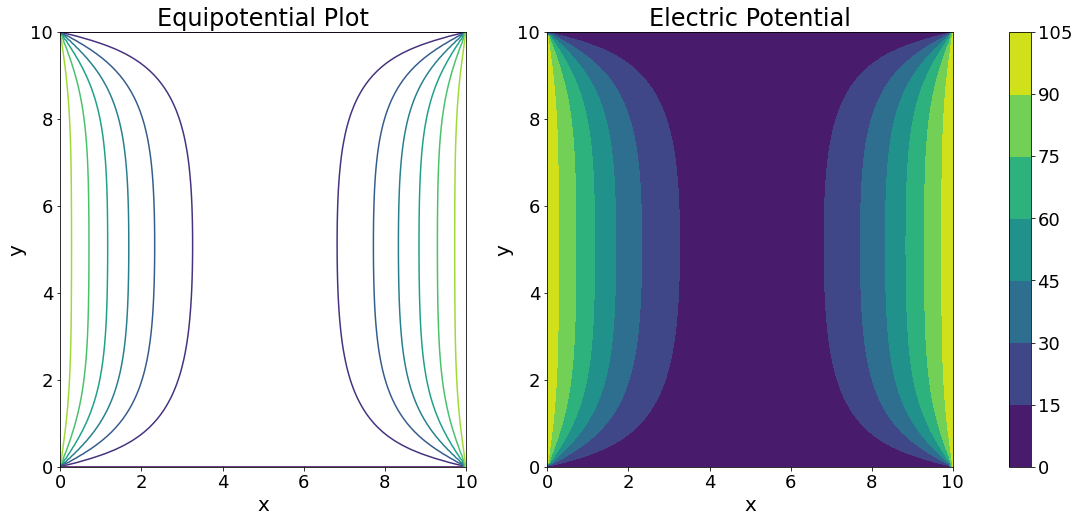

In [162]:
fig, ax=plt.subplots(ncols=2,nrows=1, figsize=(20,8))
ax=ax.flatten()
v=np.zeros(10201).reshape(101,101)
v[:,0]=100
v[0,:]=0
v[100,:]=0
v[:,100]=100
#v[:][100]=100
for k in range (500):
    for i in range (1,100):
        for j in range (1,100):  
            v[i,j]=0.25*(v[i-1,j]+v[i+1,j]+v[i,j+1]+v[i,j-1])
x=np.linspace(0,10,101)
y=np.linspace(0,10,101)
X, Y = np.meshgrid(x, y)
cs = ax[0].contour(X, Y, v)
cs = ax[1].contourf(X, Y, v)
fig.colorbar(cs,ax=ax.ravel().tolist())
ax[0].set_xlabel('x',fontsize=20)
ax[0].set_ylabel('y',fontsize=20)
ax[0].set_title('Equipotential Plot', fontsize=24)
ax[1].set_xlabel('x',fontsize=20)
ax[1].set_ylabel('y',fontsize=20)
ax[1].set_title('Electric Potential', fontsize=24)
plt.savefig('relaxation/Electric Potential.pdf')

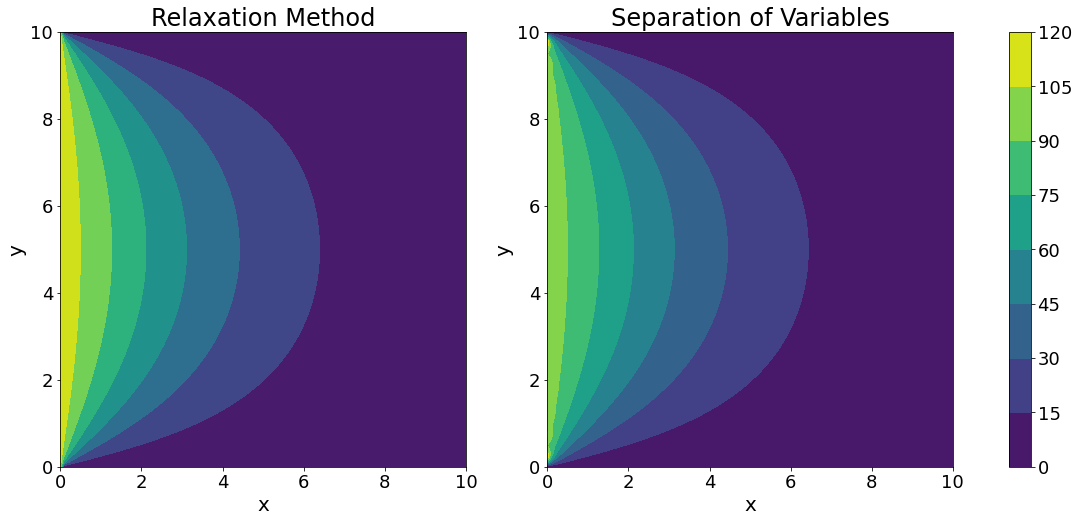

In [163]:
fig, ax=plt.subplots(ncols=2,nrows=1, figsize=(20,8))
ax=ax.flatten()
v=np.zeros(10201).reshape(101,101)
v[:,0]=100
for k in range (5000):
    for i in range (1,100):
        for j in range (1,100):  
            v[i,j]=0.25*(v[i-1,j]+v[i+1,j]+v[i,j+1]+v[i,j-1])
x=np.linspace(0,10,101)
y=np.linspace(0,10,101)
cs = ax[0].contourf(x, y, v)
ax[0].set_xlabel('x',fontsize=20)
ax[0].set_ylabel('y',fontsize=20)
ax[0].set_title('Relaxation Method', fontsize=24)
a = 10
b = 10
u0 = 100
X, Y = np.meshgrid(x, y)
U = np.zeros_like(X)
for n in range(1,40,2):
    Bn = 4*u0/(n*np.pi*np.sinh(n*np.pi*a/b))
    U = U + Bn*np.sinh(n*np.pi*(a-X)/b)*np.sin(n*np.pi*Y/b)
cs = ax[1].contourf(X, Y, U)
ax[1].set_xlabel('x',fontsize=20)
ax[1].set_ylabel('y',fontsize=20)
ax[1].set_title('Separation of Variables', fontsize=24)
fig.colorbar(cs,ax=ax.ravel().tolist())
plt.savefig('relaxation/Separation of Variables.pdf')

In [7]:
def potential(M,N):
    v=np.zeros(N**2).reshape(N,N)
    v[0,:]=100
    for k in range (M):
        for i in range (1,N-1):
            for j in range (1,N-1):  
                v[i,j]=0.25*(v[i-1,j]+v[i+1,j]+v[i,j+1]+v[i,j-1])
    return(v)
for i in range (1,11):
    %timeit potential(10,10*i)


849 µs ± 58.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.82 ms ± 40.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.63 ms ± 649 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
17.4 ms ± 729 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
27.3 ms ± 522 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
40 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
54.2 ms ± 709 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
73.7 ms ± 3.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
91.5 ms ± 2.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
110 ms ± 1.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


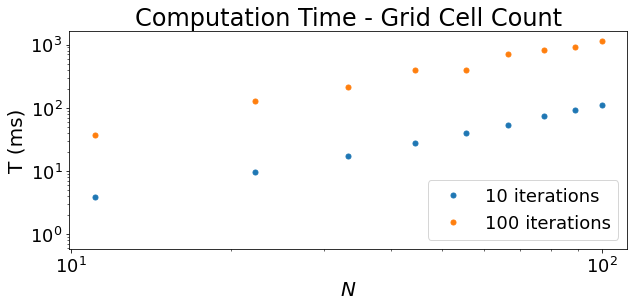

In [164]:
fig, ax=plt.subplots(figsize=(10,4))
t1=np.array([0.849,3.82,9.63,17.4,27.3,40,54.2,73.7,91.5,110])
t2=np.array([7.82,37.6,129,214,395,391,701,830,929,1130])
N=np.linspace(0,100,10)
ax.plot(N,t1,'.',label="10 iterations",markersize=10)
ax.plot(N,t2,'.',label="100 iterations",markersize=10)
ax.set_xlabel('$N$',fontsize=20)
ax.set_ylabel('T (ms)',fontsize=20)
ax.loglog()
ax.legend()
ax.set_title('Computation Time - Grid Cell Count', fontsize=24)
plt.savefig('relaxation/Computation Time.pdf')

Text(0.5, 1.0, 'Electric Field')

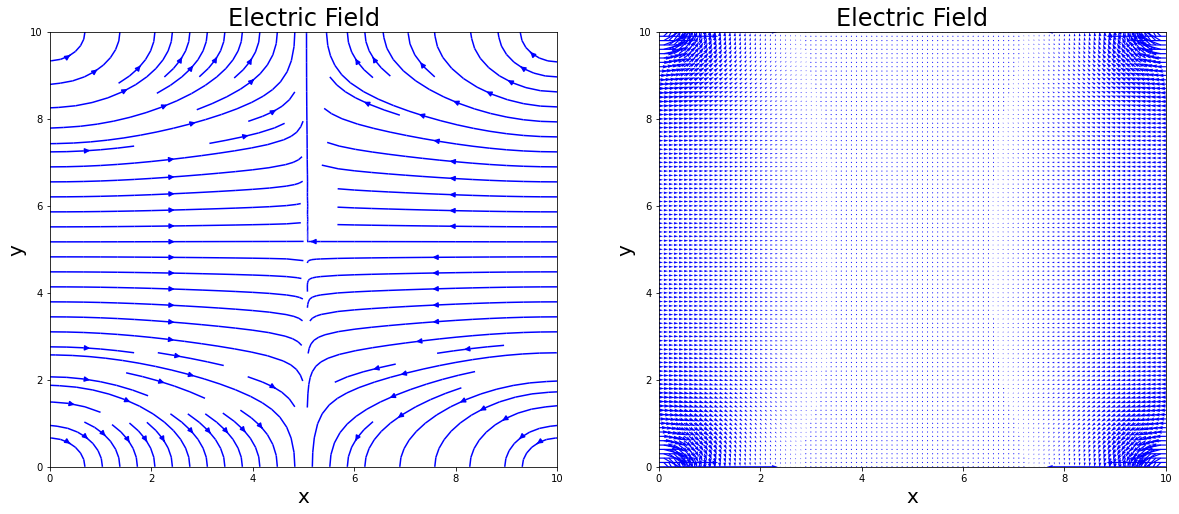

In [34]:
fig, ax=plt.subplots(ncols=2,nrows=1,figsize=(20,8))
v=np.zeros(10201).reshape(101,101)
Ex=np.zeros(101)
Ey=np.zeros(101)
v[:,0]=100
v[:,100]=100
#v[0,:]=100
#v[100,:]=100
for k in range (500):
    for i in range (1,100):
        for j in range (1,100):  
            v[i,j]=0.25*(v[i-1,j]+v[i+1,j]+v[i,j+1]+v[i,j-1])
                  
for i in range (1,100):
    Ex[i]=0.5*(v[i-1, j]-v[i+1, j])
    for j in range (1,100):
        Ey[j]=0.5*(v[i, j-1]-v[i, j+1])

v,u=np.gradient(-v)
x=np.linspace(0,10,101)
y=np.linspace(0,10,101)
X,Y=np.meshgrid(x,y, indexing='xy')
U,V=np.meshgrid(Ex,Ey, indexing='xy')
ax[0].streamplot(X, Y, u, v, color='b')
ax[1].quiver(X, Y, u, v, color='b')
fig.tight_layout
ax[0].set_xlabel('x',fontsize=20)
ax[0].set_ylabel('y',fontsize=20)
ax[0].set_xlim([0,10])
ax[0].set_ylim([0,10])
ax[0].set_title('Electric Field', fontsize=24)
ax[1].set_xlabel('x',fontsize=20)
ax[1].set_ylabel('y',fontsize=20)
ax[1].set_xlim([0,10])
ax[1].set_ylim([0,10])
ax[1].set_title('Electric Field', fontsize=24)

## Tasks: Adding charges

* Modify your code to allow point charges to be placed at arbitrary mesh points.

### Single charge

* Compute the potential due to a single charge.
* Verify that the potential falls off logarithmically, i.e., if $r\rightarrow 2r$ then the potential decreases by a factor of $\ln 2$ (for a positive charge).

### Dipole

* Compute the potential due to an electric dipole.
* What is the expected $r$ dependence? 
* Does your results have the expacted behavior?

In [ ]:
fig, ax=plt.subplots(ncols=3,nrows=2, figsize=(24,14))
plt.subplots_adjust(hspace=0.3)
ax=ax.flatten()
bound = 10 #physical boundary 
div = bound * 10 #discretization
vbound = 0 #boundary condition
Ex=np.zeros(div+1)
Ey=np.zeros(div+1)
P=np.zeros((div+1,div+1))
v=np.full_like(P,vbound)
x=np.linspace(0, bound, div+1)
y=np.linspace(0, bound, div+1)
iterations=1000
v[div//2, div//2]=100 #charge
for k in range (iterations):
    for i in range (1,div):
        for j in range (1,div):
            v[div//2, div//2]=100
            v[i, j]=0.25*(v[i-1, j]+v[i+1, j]+v[i, j+1]+v[i, j-1])

x=np.linspace(0,bound,div+1)
y=np.linspace(0,bound,div+1)
X,Y=np.meshgrid(x,y, indexing='ij')

cs = ax[0].contour(X, Y, v, 50,cmap=plt.get_cmap('hot'))
cs = ax[1].contourf(X, Y, v, 50,cmap=plt.get_cmap('hot'))

ax[0].set_xlabel('x',fontsize=20)
ax[0].set_ylabel('y',fontsize=20)
ax[0].set_title('Equipotential Plot', fontsize=24)
ax[1].set_xlabel('x',fontsize=20)
ax[1].set_ylabel('y',fontsize=20)
ax[1].axvline(bound//2, ls='--',color = 'white')
ax[1].text(5.1,8,'Sampling Line',fontsize=18, color = 'white')
ax[1].set_title('Electric Potential', fontsize=24)
ax[2].plot(x,v[:,div//2])
ax[2].set_title('Potential along Sampling Line', fontsize=24)
u=np.zeros((div+1,div+1))

u[div//2, div//4]=100
u[div//2, div*3//4]=-100
for k in range (iterations):
    for i in range (1,div):
        for j in range (1,div):
            u[div//2, div//4]=100
            u[div//2, div*3//4]=-100
            u[i, j]=0.25*(u[i-1, j]+u[i+1, j]+u[i, j+1]+u[i, j-1])


cs = ax[3].contour(X, Y, u, 50,cmap=plt.get_cmap('hot'))
cs = ax[4].contourf(X, Y, u, 50,cmap=plt.get_cmap('hot'))
ax[3].set_xlabel('x',fontsize=20)
ax[3].set_ylabel('y',fontsize=20)
ax[3].set_title('Equipotential Plot', fontsize=24)
ax[4].set_xlabel('x',fontsize=20)
ax[4].set_ylabel('y',fontsize=20)
ax[4].axvline(bound//2, ls='--',color = 'white')
ax[4].text(5.1,8,'Sampling Line',fontsize=18, color = 'white')
ax[4].set_title('Electric Potential', fontsize=24)
ax[5].plot(x,u[div//2,:])
ax[5].set_title('Potential along Sampling Line', fontsize=24)

fig.colorbar(cs,ax=ax.ravel().tolist())
plt.savefig('relaxation/Single Charge.pdf')

In [ ]:
fig, ax=plt.subplots(ncols=1,nrows=1,figsize=(12,10))
bound = 10 #physical boundary 
div = bound * 10 #discretization
vbound = 0 #boundary condition
Ex=np.zeros(div+1)
Ey=np.zeros(div+1)
P=np.zeros((div+1,div+1))
u=np.full_like(P,vbound)
x=np.linspace(0, bound, div+1)
y=np.linspace(0, bound, div+1)
iterations=1000
for k in range (iterations):
    for i in range (1,div):
        for j in range (1,div): 
            u[div//2,div//4]=100
            u[div//2,div*3//4]=-100
            u[i, j]=0.25*(u[i-1, j]+u[i+1, j]+u[i, j+1]+u[i, j-1])
                   
V,U=np.gradient(-u)        
X,Y=np.meshgrid(x,y, indexing='xy')
cs = ax.contourf(X, Y, u, 50,cmap=plt.get_cmap('hot'))
ax.streamplot(X, Y, U, V, color='white')
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_title('Dipole', fontsize=24)
fig.colorbar(cs)
plt.savefig('relaxation/Dipole.pdf')

In [ ]:
fig, ax=plt.subplots(ncols=1,nrows=1, figsize=(12,10))
bound = 10 #physical boundary 
div = bound * 10 #discretization
vbound = 0 #boundary condition
Ex=np.zeros(div+1)
Ey=np.zeros(div+1)
P=np.zeros((div+1,div+1))
u=np.full_like(P,vbound)
x=np.linspace(0, bound, div+1)
y=np.linspace(0, bound, div+1)
iterations=1000
for k in range (iterations):
    for i in range (1,div):
        for j in range (1,div):
            u[div//2, div//2]=100
            u[i, j]=0.25*(u[i-1, j]+u[i+1, j]+u[i, j+1]+u[i, j-1])

V,U=np.gradient(-u)        
X,Y=np.meshgrid(x,y, indexing='xy')
cs = ax.contourf(X, Y, u, 50,cmap=plt.get_cmap('hot'))
ax.streamplot(X, Y, U, V, color='white')
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
fig.colorbar(cs)
ax.set_title('Single Charge', fontsize=24)
plt.savefig('relaxation/Single Charge2.pdf')

In [152]:
x=np.array(['x0','x1','x2','x3','x4'])
y=np.array(['y0','y1','y2','y3','y4'])
#u, v= np.meshgrid(x,y, indexing='xy')
u, v= np.meshgrid(x,y, indexing='ij')
a=np.zeros(9).reshape(3,3)
a[1,1]=9
print(u[1,:])
print(a[0,0])

['x1' 'x1' 'x1' 'x1' 'x1']
0.0


Text(0.5, 1.0, 'Single Charge')

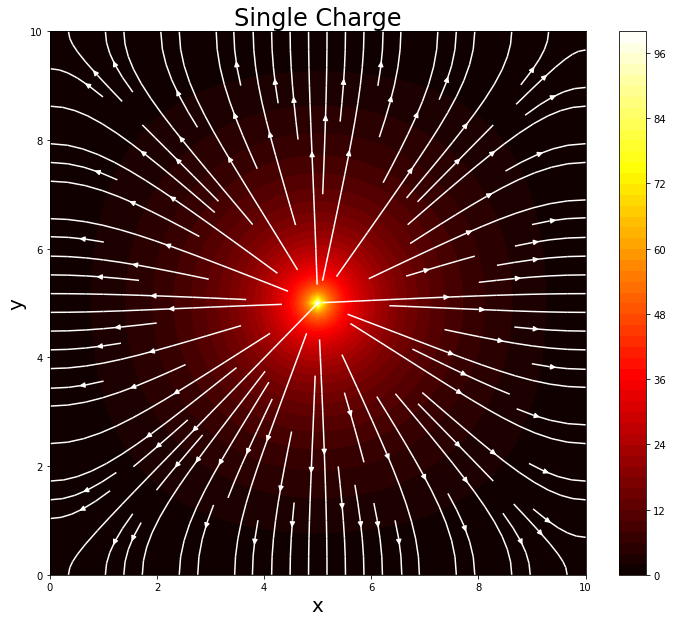

In [112]:
fig, ax=plt.subplots(figsize=(12,10))
bound = 10 #physical boundary 
div = bound * 10 #discretization
vbound = 0 #boundary condition
Ex=np.zeros(div+1)
Ey=np.zeros(div+1)
P=np.zeros((div+1,div+1))
v=np.full_like(P,vbound)
x=np.linspace(0, bound, div+1)
y=np.linspace(0, bound, div+1)
v[50, 50]=100
for k in range (1000):
    for i in range (1,100):
        for j in range (1,100):
            v[50, 50]=100
            v[i, j]=0.25*(v[i-1, j]+v[i+1, j]+v[i, j+1]+v[i, j-1])
V,U=np.gradient(-1*v)
x=np.linspace(0,bound,div+1)
y=np.linspace(0,bound,div+1)
X,Y=np.meshgrid(x,y,indexing='xy')
cs = ax.contourf(X, Y, v, 50,cmap=plt.get_cmap('hot'))
fig.colorbar(cs)
ax.streamplot(X, Y, U, V,color='white')
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_title('Single Charge', fontsize=24)

## Tasks: Parallel sheets of charges

* Use your program to calculate the potential for parallel lines of charges.
* Compute the capacitance.


### Method-1

* Use two edges of the domain as the plates.
* Use periodic boundary conditions in the direction along the plates.

In [ ]:
fig, ax=plt.subplots(ncols=1,nrows=1, figsize=(10,8))
bound=10
div=100
iterations=1000
v=np.zeros((div+1,div+1))
v[0:]=100
v[div,:]=-100
for k in range (1000):
    for i in range (1,div):
        for j in range (div+1):
            if(j==0):
                v[i,j]=0.25*(v[i-1,j]+v[i+1,j]+v[i,j+1]+v[i,-1])
            elif(j==div):
                v[i,j]=0.25*(v[i-1,j]+v[i+1,j]+v[i,0]+v[i,i-1])
            else:
                v[i,j]=0.25*(v[i-1,j]+v[i+1,j]+v[i,j+1]+v[i,j-1])
x=np.linspace(0,bound,div+1)
y=np.linspace(0,bound,div+1)
V,U=np.gradient(-1*v)
X, Y = np.meshgrid(x, y, indexing='xy')
cs = ax.contourf(X, Y, v,50,cmap=plt.get_cmap('hot'))
ax.streamplot(X, Y, U, V,color='b')
fig.colorbar(cs)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_xlim([0,10])
ax.set_ylim([0,10])
ax.set_title('Parallel Charged Plates at Boudary', fontsize=24)
plt.savefig('relaxation/Boundary Plate.pdf')

### Method-2

* Introduce actual lines of equal and opposite charge **NOT** on the boundaries, and solve Poisson's equation both between and outside the plates.
* Stretch the lines of charges across the domain and impose periodic boundary conditions in the directions along the sheets.
* Impose *anti-periodic* boundary conditions in the direction perpendicular to the sheets (make sure you understand why), i.e., $V_{bottom}=-V_{top}$.

In [ ]:
fig, ax=plt.subplots(ncols=1,nrows=1, figsize=(10,8))
x_domain=10
x_div=101
y_domain=10
y_div=101
iterations=1000
v=np.zeros((x_div,y_div))
bound1=x_div//4
bound2=x_div*3//4
v[bound1,:]=100
v[bound2,:]=-100
for k in range (iterations):
    for i in range (x_div):
        for j in range (y_div):
            if(i==bound1 or i==bound2):
                v[i,j]=v[i,j]
            
            elif(i==0 and j==0):
                v[i,j]=0.25*(-v[-1,j]+v[i+1,j]+v[i,-1]+v[i,j+1])
            elif(i==0 and j==y_div-1):
                v[i,j]=0.25*(-v[-1,j]+v[i+1,j]+v[i,j-1]+v[i,0])
            elif(i==0):
                v[i,j]=0.25*(-v[-1,j]+v[i+1,j]+v[i,j+1]+v[i,j-1])
                
            elif(i==x_div-1 and j==0):
                v[i,j]=0.25*(v[i-1,j]-v[0,j]+v[i,-1]+v[i,j+1])
            elif(i==x_div-1 and j==y_div-1):
                v[i,j]=0.25*(v[i-1,j]-v[0,j]+v[i,j-1]+v[i,0])
            elif(i==x_div-1):
                v[i,j]=0.25*(v[i-1,j]-v[0,j]++v[i,j+1]+v[i,j-1])
            
            elif(j==0):
                v[i,j]=0.25*(v[i-1,j]+v[i+1,j]+v[i,j+1]+v[i,-1])
            elif(j==y_div-1):
                v[i,j]=0.25*(v[i-1,j]+v[i+1,j]+v[i,0]+v[i,j-1])
            else:
                v[i,j]=0.25*(v[i-1,j]+v[i+1,j]+v[i,j+1]+v[i,j-1])

x=np.linspace(0,bound,div+1)
y=np.linspace(0,bound,div+1)
V,U=np.gradient(-1*v)
X, Y = np.meshgrid(x, y, indexing='xy')
cs = ax.contourf(X, Y, v,50,cmap=plt.get_cmap('hot'))
ax.streamplot(X, Y, U, V,color='b')
fig.colorbar(cs)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_xlim([0,10])
ax.set_ylim([0,10])
ax.set_title('Parallel Charged Plates', fontsize=24)
plt.savefig('relaxation/Plate.pdf')

### Method-3

* Now consider two finite slabs.
* What are the appropriate boundary conditions.

In [ ]:
fig, ax=plt.subplots(ncols=1,nrows=1, figsize=(10,8))
x_domain=10
x_div=101
y_domain=10
y_div=101
iterations=1000
v=np.zeros((x_div,y_div))
x_bound1=x_div//4
y_bound1=y_div//4
x_bound2=x_div*3//4
y_bound2=y_div*3//4
v[x_bound1,y_bound1:y_bound2]=100
v[x_bound2,y_bound1:y_bound2]=-100

for k in range (iterations):
    for i in range (x_div):
        for j in range (y_div):
            if(i==x_bound1 or i==x_bound2):
                if(y_bound1<=j<y_bound2):
                    v[i,j]=v[i,j]
                elif(j==0):
                    v[i,j]=0.25*(v[i-1,j]+v[i+1,j]+v[i,j+1]+v[i,-1])
                elif(j==y_div-1):
                    v[i,j]=0.25*(v[i-1,j]+v[i+1,j]+v[i,0]+v[i,j-1])
                else:
                    v[i,j]=0.25*(v[i-1,j]+v[i+1,j]+v[i,j+1]+v[i,j-1])

            elif(i==0 and j==0):#-+++
                v[i,j]=0.25*(-v[-1,j]+v[i+1,j]+v[i,-1]+v[i,j+1])
            elif(i==0 and j==y_div-1):
                v[i,j]=0.25*(-v[-1,j]+v[i+1,j]+v[i,j-1]+v[i,0])
            elif(i==0):
                v[i,j]=0.25*(-v[-1,j]+v[i+1,j]+v[i,j+1]+v[i,j-1])
                
            elif(i==x_div-1 and j==0):#+-++
                v[i,j]=0.25*(v[i-1,j]-v[0,j]+v[i,-1]+v[i,j+1])
            elif(i==x_div-1 and j==y_div-1):
                v[i,j]=0.25*(v[i-1,j]-v[0,j]+v[i,j-1]+v[i,0])
            elif(i==x_div-1):
                v[i,j]=0.25*(v[i-1,j]-v[0,j]+v[i,j+1]+v[i,j-1])
            
            elif(j==0):
                v[i,j]=0.25*(v[i-1,j]+v[i+1,j]+v[i,j+1]+v[i,-1])
            elif(j==y_div-1):
                v[i,j]=0.25*(v[i-1,j]+v[i+1,j]+v[i,0]+v[i,j-1])
            else:
                v[i,j]=0.25*(v[i-1,j]+v[i+1,j]+v[i,j+1]+v[i,j-1])

x=np.linspace(0,x_domain,x_div)
y=np.linspace(0,y_domain,y_div)
V,U=np.gradient(-1*v)
X, Y = np.meshgrid(x, y, indexing='xy')
cs = ax.contourf(X, Y, v,50,cmap=plt.get_cmap('hot'))
ax.streamplot(X, Y, U, V,color='b')
fig.colorbar(cs)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_xlim([0,10])
ax.set_ylim([0,10])
ax.set_title('Finite Parallel Charged Plates', fontsize=24)
plt.savefig('relaxation/Finite Plates.pdf')

Text(0.5, 1.0, 'Electric Field and Potential Plot')

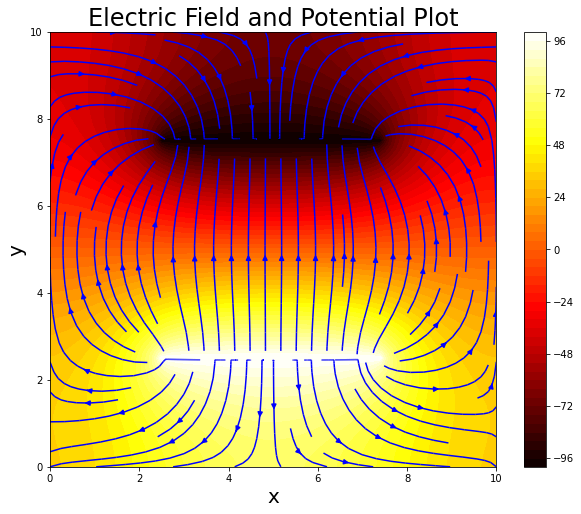

In [95]:
fig, ax=plt.subplots(ncols=1,nrows=1, figsize=(10,8))
x_domain=10
x_div=101
y_domain=10
y_div=101
iterations=1000
v=np.zeros((x_div,y_div))
x_bound1=x_div//4
y_bound1=y_div//4
x_bound2=x_div*3//4
y_bound2=y_div*3//4
v[x_bound1,y_bound1:y_bound2]=100
v[x_bound2,y_bound1:y_bound2]=-100

for k in range (iterations):
    for i in range (x_div):
        for j in range (y_div):
            if(i==x_bound1 or i==x_bound2):
                if(y_bound1<=j<y_bound2):
                    v[i,j]=v[i,j]
                elif(j==0):
                    v[i,j]=0.25*(v[i-1,j]+v[i+1,j]+v[i,j+1]+v[i,-1])
                elif(j==y_div-1):
                    v[i,j]=0.25*(v[i-1,j]+v[i+1,j]+v[i,0]+v[i,j-1])
                else:
                    v[i,j]=0.25*(v[i-1,j]+v[i+1,j]+v[i,j+1]+v[i,j-1])

            elif(i==0 and j==0):#-+++
                v[i,j]=0.25*(v[i,j]+v[i+1,j]+v[i,-1]+v[i,j+1])
            elif(i==0 and j==y_div-1):
                v[i,j]=0.25*(v[i,j]+v[i+1,j]+v[i,j-1]+v[i,0])
            elif(i==0):
                v[i,j]=0.25*(v[i,j]+v[i+1,j]+v[i,j+1]+v[i,j-1])
                
            elif(i==x_div-1 and j==0):#+-++
                v[i,j]=0.25*(v[i-1,j]+v[i,j]+v[i,-1]+v[i,j+1])
            elif(i==x_div-1 and j==y_div-1):
                v[i,j]=0.25*(v[i-1,j]+v[i,j]+v[i,j-1]+v[i,0])
            elif(i==x_div-1):
                v[i,j]=0.25*(v[i-1,j]+v[i,j]+v[i,j+1]+v[i,j-1])
            
            elif(j==0):
                v[i,j]=0.25*(v[i-1,j]+v[i+1,j]+v[i,j+1]+v[i,-1])
            elif(j==y_div-1):
                v[i,j]=0.25*(v[i-1,j]+v[i+1,j]+v[i,0]+v[i,j-1])
            else:
                v[i,j]=0.25*(v[i-1,j]+v[i+1,j]+v[i,j+1]+v[i,j-1])

x=np.linspace(0,x_domain,x_div)
y=np.linspace(0,y_domain,y_div)
V,U=np.gradient(-1*v)
X, Y = np.meshgrid(x, y, indexing='xy')
cs = ax.contourf(X, Y, v,50,cmap=plt.get_cmap('hot'))
ax.streamplot(X, Y, U, V,color='b')
fig.colorbar(cs)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_xlim([0,10])
ax.set_ylim([0,10])
ax.set_title('Electric Field and Potential Plot', fontsize=24)

## Tasks: Concentric rectangles

* Modify your program to solve for $V$between two recrangular boundaries held at constant potential.
* Calculate the surface charge density on the boundary surface. $\lambda = \epsilon_0 \vec{n}\cdot \vec{E}$.
* Determine the total charge on each surface. How do they compare?
* Determine the capacitance of the system.

In [ ]:
fig, ax=plt.subplots(ncols=1,nrows=1, figsize=(10,8))
bound=10
dim=100
v=np.zeros((dim+1,dim+1))
iterations = 1000
def init():
    v[0,:]=100 #left
    v[dim//4,dim//4:dim*3//4]=-100
    v[dim,:]=100 #right
    v[dim*3//4,dim//4:dim*3//4]=-100
    v[:,0]=100 #bottom
    v[dim//4:dim*3//4,dim//4]=-100
    v[:,dim]=100 #top
    v[dim//4:dim*3//4,dim*3//4]=-100
    return
init()
for k in range (iterations):
    for i in range (1,dim):
        for j in range (1,dim):
            v[i,j]=0.25*(v[i+1,j]+v[i-1,j]+v[i,j+1]+v[i,j-1])
            init()

x=np.linspace(0,bound,dim+1)
y=np.linspace(0,bound,dim+1)
V,U=np.gradient(-1*v)
X, Y = np.meshgrid(x, y, indexing='xy')
cs = ax.contourf(X, Y, v,50,cmap=plt.get_cmap('hot'))
ax.streamplot(X, Y, U, V,color='b')
fig.colorbar(cs)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_xlim([0,10])
ax.set_ylim([0,10])
ax.set_title('Concentric Charged Square Loops', fontsize=24)
plt.savefig('relaxation/square loop.pdf')

## Tasks: Elaborations (Bonus!)

If you are ambitious, try to implement
* Overrelaxation method.
* Multigruid mehtod.

Text(0.5, 1.0, 'Electric Field and Potential Plot')

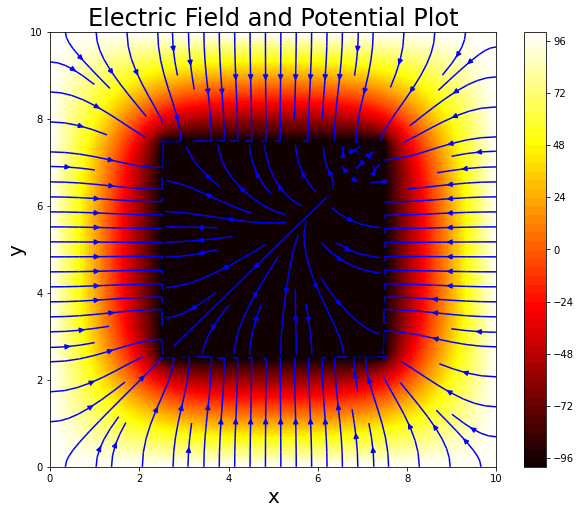

In [114]:
fig, ax=plt.subplots(ncols=1,nrows=1, figsize=(10,8))
bound=10
N=9
dim=2**N
v=np.zeros((dim+1,dim+1))
iterations = 200

def init(): 
    v[0,:]=100 #left
    v[dim//4,dim//4:dim*3//4]=-100
    v[dim,:]=100 #right
    v[dim*3//4,dim//4:dim*3//4]=-100
    v[:,0]=100 #bottom
    v[dim//4:dim*3//4,dim//4]=-100
    v[:,dim]=100 #top
    v[dim//4:dim*3//4,dim*3//4]=-100
    return
init()

for k in range (8):
    for l in range (iterations):
        #Jacobi Method
        v[2**(N-k-1):dim:2**(N-k-1),2**(N-k-1):dim:2**(N-k-1)]=0.25*(v[0:dim-2**(N-k-1):2**(N-k-1),2**(N-k-1):dim:2**(N-k-1)]+\
                                                                     v[2**(N-k):dim+1:2**(N-k-1),2**(N-k-1):dim:2**(N-k-1)]+\
                                                                     v[2**(N-k-1):dim:2**(N-k-1),0:dim-2**(N-k-1):2**(N-k-1)]+\
                                                                     v[2**(N-k-1):dim:2**(N-k-1),2**(N-k):dim+1:2**(N-k-1)])
        init()
    #center average
    v[2**(N-k-2):dim+1:2**(N-k-1),2**(N-k-2):dim+1:2**(N-k-1)]=0.25*(v[0:dim:2**(N-k-1),0:dim:2**(N-k-1)]+\
                                                                     v[0:dim:2**(N-k-1),2**(N-k-1):dim+1:2**(N-k-1)]+\
                                                                     v[2**(N-k-1):dim+1:2**(N-k-1),0:dim:2**(N-k-1)]+\
                                                                     v[2**(N-k-1):dim+1:2**(N-k-1),2**(N-k-1):dim+1:2**(N-k-1)])
    #left-right average
    v[2**(N-k-2):dim+1:2**(N-k-1),0:dim+1:2**(N-k-1)]=0.5*(v[0:dim:2**(N-k-1),0:dim+1:2**(N-k-1)]+\
                                                           v[2**(N-k-1):dim+1:2**(N-k-1),0:dim+1:2**(N-k-1)])
    #top-bottom average
    v[0:dim+1:2**(N-k-1),2**(N-k-2):dim+1:2**(N-k-1)]=0.5*(v[0:dim+1:2**(N-k-1),0:dim:2**(N-k-1)]+\
                                                           v[0:dim+1:2**(N-k-1),2**(N-k-1):dim+1:2**(N-k-1)])
    init()

x=np.linspace(0,bound,dim+1)
y=np.linspace(0,bound,dim+1)
V,U=np.gradient(-1*v)
X, Y = np.meshgrid(x, y, indexing='xy')
cs = ax.contourf(X, Y, v,50,cmap=plt.get_cmap('hot'))
#ax.streamplot(X, Y, U, V,color='b')
fig.colorbar(cs)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_xlim([0,10])
ax.set_ylim([0,10])
ax.set_title('Electric Field and Potential Plot', fontsize=24)

## Arbitrary Boundary Shape (correcton for non-grid-points)
The iterative scheme of relaxation method takes the average value of the four nearest neighbor of grid point $(i,j)$.

When the neighboring point is not on a lattice point, we extrapolate with factors $a,b$ to account for the actual boundary location, while still using the indices $i,j \pm 1$ to hold the value.

Here $a,b \le 1$, and the modified average becomes:

$$
V_{i,j}=\frac{ab}{(a+b)} \left[\frac{V_{i+1,j}}{(a+1)} + \frac{V_{i-1,j}}{a(a+1)} + \frac{V_{i,j+1}}{(b+1)} + \frac{V_{i,j-1}}{b(b+1)} \right]
$$
Which reduces to its original form when $a,b = 1$

In [ ]:
fig, ax=plt.subplots(ncols=1,nrows=1, figsize=(10,10))
radius=5
bound=radius*2

div=2*bound

x=np.linspace(0, bound, div+1)
y=np.linspace(0, bound, div+1)
t=np.linspace(0,2*np.pi,100)
ax.plot(x[div//2],y[div//2],'.',color='black',markersize=20)

for i in range (div+1):
    for j in range (div+1):
        if((div//2-i)**2+(div//2-j)**2==(div//2)**2):
            ax.plot(x[i],y[j],'.',color='blue',markersize=20)
            print((div//2-i)**2+(div//2-j)**2)
        elif((div//2-i)**2+(div//2-j)**2<(div//2)**2):
            ax.plot(x[i],y[j],'.',color='green')
        elif((div//2-i)**2+(div//2-j)**2>(div//2)**2):
            ax.plot(x[i],y[j],'.',color='red')
ax.plot(5*np.cos(t)+5,5*np.sin(t)+5)
ax.set_xlim([-0.5,bound+0.5])
ax.set_ylim([-0.5,bound+0.5])

#X,Y=np.meshgrid(x,y,indexing='ij')
#cs=ax.contourf(X, Y, v, 50,cmap=plt.get_cmap('bwr'))
#fig.colorbar(cs)

ax.set_title('Circular Domain', fontsize=24)
plt.savefig('relaxation/Circular Domain.pdf')

In [ ]:
fig, ax=plt.subplots(figsize=(12,10))
radius=5 #physical length
bound=radius*2 #physical distance
div=10*bound #division and gridspace distance
R=div//2 #radius gridspace length
iterations = 1000
vbound=0
def dist(p,q):
    return np.sqrt(p**2 + q**2)

def coef(p,q):
    return (p*q)/(p+q)

#plot domain
V=np.zeros((div+1,div+1))
v=np.full_like(V,vbound)
x=np.linspace(0, bound, div+1)
y=np.linspace(0, bound, div+1)

#boundary conditions
def init(): 
    v[R,R]=100 #charge
    v[0,:]=vbound #left
    v[div,:]=vbound #right
    v[:,0]=vbound #bottom
    v[:,div]=vbound #top
    return
init()

for k in range (iterations):
    for i in range (div+1):
        for j in range (div+1):
            init()
            if(dist((R-i),(R-j)) == R):
                v[i,j]=vbound
                
                #print('bound',i,j)
            elif(dist((R-i),(R-j)) > R):
                v[i,j]=vbound

            elif(dist((R-i),(R-j)) < R):
                #ax.plot(x[i],y[j],'.',color='red')
                if (dist(R-(i+1),(R-j)) > R): #right
                    a = R-i-np.sqrt(R**2 - (R-j)**2)
                    if(dist((R-i),R-(j-1)) > R): #bottom
                        b = j-R+np.sqrt(R**2 - (i-R)**2)
                        v[i,j]= coef(a,b)*(v[i-1,j]/(a+1) + v[i+1,j]/(a**2 + a) + v[i,j+1]/(b+1) + v[i,j-1]/(b**2 + b))
                    
                    elif (dist((R-i),R-(j+1)) > R): #top
                        b = R-j-np.sqrt(R**2 - (R-i)**2)
                        v[i,j]= coef(a,b)*(v[i-1,j]/(a+1) + v[i+1,j]/(a**2 + a) + v[i,j-1]/(b+1) + v[i,j+1]/(b**2 + b))
                
                elif(dist(R-(i-1),(R-j)) > R): #left
                    a = i-R+np.sqrt(R**2 - (j-R)**2)
                    if(dist((R-i),R-(j-1)) > R): #bottom
                        b = j-R+np.sqrt(R**2 - (i-R)**2)
                        v[i,j]= coef(a,b)*(v[i+1,j]/(a+1) + v[i-1,j]/(a**2 + a) + v[i,j+1]/(b+1) + v[i,j-1]/(b**2 + b))
                   
                    elif (dist((R-i),R-(j+1)) > R): #top
                        b = R-j-np.sqrt(R**2 - (R-i)**2)
                        v[i,j]= coef(a,b)*(v[i+1,j]/(a+1) + v[i-1,j]/(a**2 + a) + v[i,j-1]/(b+1) + v[i,j+1]/(b**2 + b))
                else: #completely interior
                    v[i,j]=0.25*(v[i+1,j]+v[i-1,j]+v[i,j+1]+v[i,j-1])
Q, P = np.gradient(-v)
X, Y = np.meshgrid(x, y, indexing='xy')
cs = ax.contourf(X, Y, v, 50,cmap=plt.get_cmap('hot'))
ax.streamplot(X, Y, P, Q, color='white')
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_title('Single Charge', fontsize=24)
fig.colorbar(cs)
plt.savefig('relaxation/Single Charge 3.pdf')

In [ ]:
fig, ax=plt.subplots(figsize=(12,10))
radius=5 #physical length
bound=radius*2 #physical distance
div=10*bound #division and gridspace distance
R=div//2 #radius gridspace length
iterations = 1000
vbound=0
def dist(p,q):
    return np.sqrt(p**2 + q**2)

def coef(p,q):
    return (p*q)/(p+q)

#plot domain
V=np.zeros((div+1,div+1))
v=np.full_like(V,vbound)
x=np.linspace(0, bound, div+1)
y=np.linspace(0, bound, div+1)

#boundary conditions
def init(): 
    v[R-10,R]=100 #charge
    v[R+10,R]=-100
    v[0,:]=vbound #left
    v[div,:]=vbound #right
    v[:,0]=vbound #bottom
    v[:,div]=vbound #top
    return
init()

for k in range (iterations):
    for i in range (div+1):
        for j in range (div+1):
            init()
            if(dist((R-i),(R-j)) == R):
                v[i,j]=vbound
                
                #print('bound',i,j)
            elif(dist((R-i),(R-j)) > R):
                v[i,j]=vbound

            elif(dist((R-i),(R-j)) < R):
                #ax.plot(x[i],y[j],'.',color='red')
                if (dist(R-(i+1),(R-j)) > R): #right
                    a = R-i-np.sqrt(R**2 - (R-j)**2)
                    if(dist((R-i),R-(j-1)) > R): #bottom
                        b = j-R+np.sqrt(R**2 - (i-R)**2)
                        v[i,j]= coef(a,b)*(v[i-1,j]/(a+1) + v[i+1,j]/(a**2 + a) + v[i,j+1]/(b+1) + v[i,j-1]/(b**2 + b))
                    
                    elif (dist((R-i),R-(j+1)) > R): #top
                        b = R-j-np.sqrt(R**2 - (R-i)**2)
                        v[i,j]= coef(a,b)*(v[i-1,j]/(a+1) + v[i+1,j]/(a**2 + a) + v[i,j-1]/(b+1) + v[i,j+1]/(b**2 + b))
                
                elif(dist(R-(i-1),(R-j)) > R): #left
                    a = i-R+np.sqrt(R**2 - (j-R)**2)
                    if(dist((R-i),R-(j-1)) > R): #bottom
                        b = j-R+np.sqrt(R**2 - (i-R)**2)
                        v[i,j]= coef(a,b)*(v[i+1,j]/(a+1) + v[i-1,j]/(a**2 + a) + v[i,j+1]/(b+1) + v[i,j-1]/(b**2 + b))
                   
                    elif (dist((R-i),R-(j+1)) > R): #top
                        b = R-j-np.sqrt(R**2 - (R-i)**2)
                        v[i,j]= coef(a,b)*(v[i+1,j]/(a+1) + v[i-1,j]/(a**2 + a) + v[i,j-1]/(b+1) + v[i,j+1]/(b**2 + b))
                else: #completely interior
                    v[i,j]=0.25*(v[i+1,j]+v[i-1,j]+v[i,j+1]+v[i,j-1])
Q, P = np.gradient(-v)
X, Y = np.meshgrid(x, y, indexing='xy')
cs = ax.contourf(X, Y, v, 50,cmap=plt.get_cmap('hot'))
ax.streamplot(X, Y, P, Q, color='white')
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_title('Dipole', fontsize=24)
fig.colorbar(cs)
plt.savefig('relaxation/Dipole 2.pdf')

In [ ]:
fig, ax=plt.subplots(figsize=(12,10))
radius=5 #physical length
bound=radius*2 #physical distance
div=10*bound #division and gridspace distance
R=div//2 #radius gridspace length
iterations = 1000
vbound=0
def dist(p,q):
    return np.sqrt(p**2 + q**2)

def coef(p,q):
    return (p*q)/(p+q)

#plot domain
V=np.zeros((div+1,div+1))
v=np.full_like(V,vbound)
x=np.linspace(0, bound, div+1)
y=np.linspace(0, bound, div+1)

#boundary conditions
def init(): 
    v[R-10,R-10]=-100 #charge
    v[R-10,R+10]=100
    v[R+10,R-10]=100 
    v[R+10,R+10]=-100
    v[0,:]=vbound #left
    v[div,:]=vbound #right
    v[:,0]=vbound #bottom
    v[:,div]=vbound #top
    return
init()

for k in range (iterations):
    for i in range (div+1):
        for j in range (div+1):
            init()
            if(dist((R-i),(R-j)) == R):
                v[i,j]=vbound
                
                #print('bound',i,j)
            elif(dist((R-i),(R-j)) > R):
                v[i,j]=vbound

            elif(dist((R-i),(R-j)) < R):
                #ax.plot(x[i],y[j],'.',color='red')
                if (dist(R-(i+1),(R-j)) > R): #right
                    a = R-i-np.sqrt(R**2 - (R-j)**2)
                    if(dist((R-i),R-(j-1)) > R): #bottom
                        b = j-R+np.sqrt(R**2 - (i-R)**2)
                        v[i,j]= coef(a,b)*(v[i-1,j]/(a+1) + v[i+1,j]/(a**2 + a) + v[i,j+1]/(b+1) + v[i,j-1]/(b**2 + b))
                    
                    elif (dist((R-i),R-(j+1)) > R): #top
                        b = R-j-np.sqrt(R**2 - (R-i)**2)
                        v[i,j]= coef(a,b)*(v[i-1,j]/(a+1) + v[i+1,j]/(a**2 + a) + v[i,j-1]/(b+1) + v[i,j+1]/(b**2 + b))
                
                elif(dist(R-(i-1),(R-j)) > R): #left
                    a = i-R+np.sqrt(R**2 - (j-R)**2)
                    if(dist((R-i),R-(j-1)) > R): #bottom
                        b = j-R+np.sqrt(R**2 - (i-R)**2)
                        v[i,j]= coef(a,b)*(v[i+1,j]/(a+1) + v[i-1,j]/(a**2 + a) + v[i,j+1]/(b+1) + v[i,j-1]/(b**2 + b))
                   
                    elif (dist((R-i),R-(j+1)) > R): #top
                        b = R-j-np.sqrt(R**2 - (R-i)**2)
                        v[i,j]= coef(a,b)*(v[i+1,j]/(a+1) + v[i-1,j]/(a**2 + a) + v[i,j-1]/(b+1) + v[i,j+1]/(b**2 + b))
                else: #completely interior
                    v[i,j]=0.25*(v[i+1,j]+v[i-1,j]+v[i,j+1]+v[i,j-1])

Q, P = np.gradient(-v)
X, Y = np.meshgrid(x, y, indexing='xy')
cs = ax.contourf(X, Y, v, 50,cmap=plt.get_cmap('hot'))
ax.streamplot(X, Y, P, Q, color='white')
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_title('Quadrupole', fontsize=24)
fig.colorbar(cs)
plt.savefig('relaxation/Quadrupole.pdf')